In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
%matplotlib inline

In [4]:
aisles = pd.read_csv('C:/Users/Playdata/Desktop/miniproject/data/aisles.csv', sep=',')
depts = pd.read_csv('C:/Users/Playdata/Desktop/miniproject/data/departments.csv', sep=',')
prior = pd.read_csv('C:/Users/Playdata/Desktop/miniproject/data/order_products__prior.csv', sep=',')
train = pd.read_csv('C:/Users/Playdata/Desktop/miniproject/data/order_products__train.csv', sep=',')
orders = pd.read_csv('C:/Users/Playdata/Desktop/miniproject/data/orders.csv', sep=',')
products = pd.read_csv('C:/Users/Playdata/Desktop/miniproject/data/products.csv', sep=',')

Step1. 데이터 확인

In [5]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
depts.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
depts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [9]:
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [36]:
prior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 9 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
product_name         object
aisle_id             int64
department_id        int64
aisle                object
department           object
dtypes: int64(6), object(3)
memory usage: 2.4+ GB


In [10]:
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [12]:
orders.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


1) 데이터셋이 어떻게 구분되어있는지 확인

In [13]:
data_set = orders['order_id'].groupby(orders['eval_set']).count()

Text(0.5,1,'dataset')

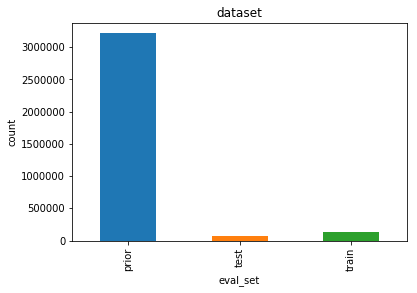

In [14]:
data_set.plot(kind='bar')
plt.ylabel('count')
plt.title('dataset')

2) 각 데이터셋(prior, test, train) 별로 day_of_week에 따른 주문량이 어떤지 확인

Text(0.5,1,'train data')

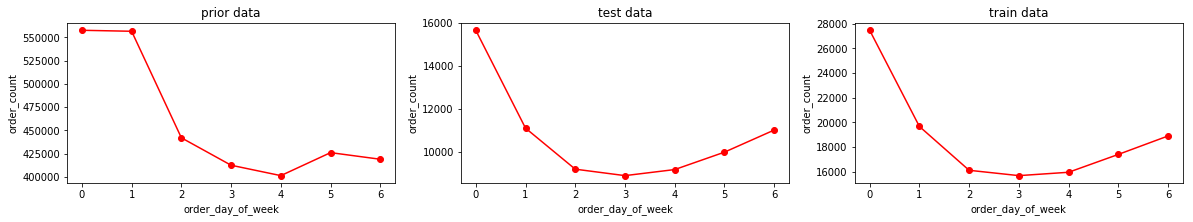

In [15]:
plt.figure(figsize=(20,10))

plt.subplot(3,3,1)
plt.plot(orders[orders['eval_set'] == 'prior']['order_id'].groupby(orders['order_dow']).count(), marker='o', color='red')
plt.xlabel('order_day_of_week')
plt.ylabel('order_count')
plt.title('prior data')

plt.subplot(3,3,2)
plt.plot(orders[orders['eval_set'] == 'test']['order_id'].groupby(orders['order_dow']).count(), marker='o', color='red')
plt.xlabel('order_day_of_week')
plt.ylabel('order_count')
plt.title('test data')

plt.subplot(3,3,3)
plt.plot(orders[orders['eval_set'] == 'train']['order_id'].groupby(orders['order_dow']).count(), marker='o', color='red')
plt.xlabel('order_day_of_week')
plt.ylabel('order_count')
plt.title('train data')

그래프를 보면, prior data의 그래프가 test data와 train data의 분포와 다르게 그려지는 것 알 수 있다. 
이것은 전체 데이터에서 prior data와 test data, train data를 구분할 때의 오류일 수 있을 것이다

3) day_of_week별, 시간대별 주문량 비교를 통해 day_of_week의 0~6이 무슨 요일을 의미하는지 파악하고자 한다

In [16]:
orders_0 = orders.loc[orders["order_dow"] == 0]
orders_1 = orders.loc[orders["order_dow"] == 1]
orders_2 = orders.loc[orders["order_dow"] == 2]
orders_3 = orders.loc[orders["order_dow"] == 3]
orders_4 = orders.loc[orders["order_dow"] == 4]
orders_5 = orders.loc[orders["order_dow"] == 5]
orders_6 = orders.loc[orders["order_dow"] == 6]

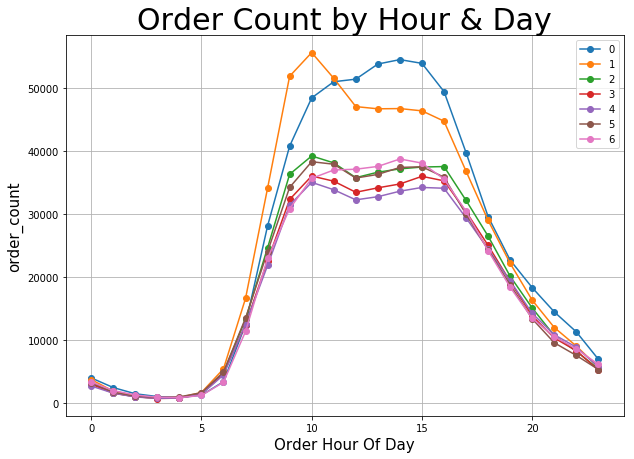

In [31]:
plt.figure(figsize=(10, 7))
plt.plot(orders_0['order_id'].groupby(orders_0['order_hour_of_day']).count(), marker='o', label='0')
plt.plot(orders_1['order_id'].groupby(orders_1['order_hour_of_day']).count(), marker='o', label='1')
plt.plot(orders_2['order_id'].groupby(orders_2['order_hour_of_day']).count(), marker='o', label='2')
plt.plot(orders_3['order_id'].groupby(orders_3['order_hour_of_day']).count(), marker='o', label='3')
plt.plot(orders_4['order_id'].groupby(orders_4['order_hour_of_day']).count(), marker='o', label='4')
plt.plot(orders_5['order_id'].groupby(orders_5['order_hour_of_day']).count(), marker='o', label='5')
plt.plot(orders_6['order_id'].groupby(orders_6['order_hour_of_day']).count(), marker='o', label='6')

plt.title('Order Count by Hour & Day', size=30)
plt.xlabel('Order Hour Of Day', size=15)
plt.ylabel('order_count', size=15)
plt.grid()
plt.legend()
plt.show()

그래프를 보면, 0과 1에서 주문량이 확연히 많은 것을 확인할 수 있다. 이를 통해, 0과 1은 주말을 나타내는 것임을 알 수 있고, 따라서 0은 토요일, 1은 일요일이라고 할 수 있다. <br>

토요일은 3시를 기점으로 주문량이 많아지고, 일요일은 10시를 기점으로 주문량이 많아진다. <br>
평일에는 비슷한 패턴을 보이는데, 다른 평일은 오전 10시를 기점으로 주문량이 하락하다 다시 증가하는 추세를 보이는 반면, 금요일의 경우 계속 증가하는 추세를 보이고 있다. 

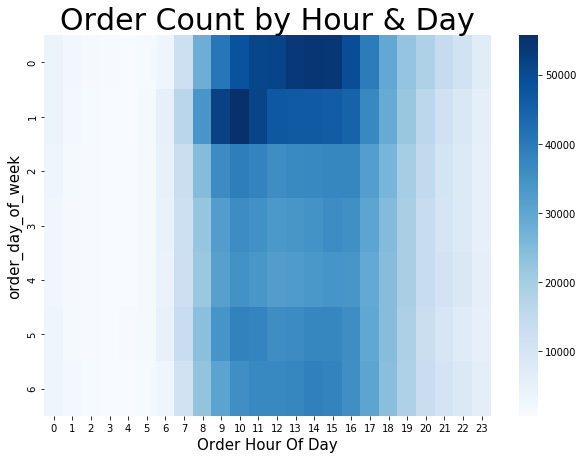

In [32]:
order_dow_hour = orders.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
order_dow_hour = order_dow_hour.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(10, 7))
sns.heatmap(order_dow_hour, cmap='Blues')
plt.title('Order Count by Hour & Day', size=30)
plt.xlabel('Order Hour Of Day', size=15)
plt.ylabel('order_day_of_week', size=15)
plt.show()

같은 그래프를 Heatmap그래프로 그린 것. 주말 열두시 전후 2시간에 주문량이 몰린 것을 확인할 수 있다. 

4) 총 주문 횟수가 같은 사람들이 몇 명인지 확인해본다.

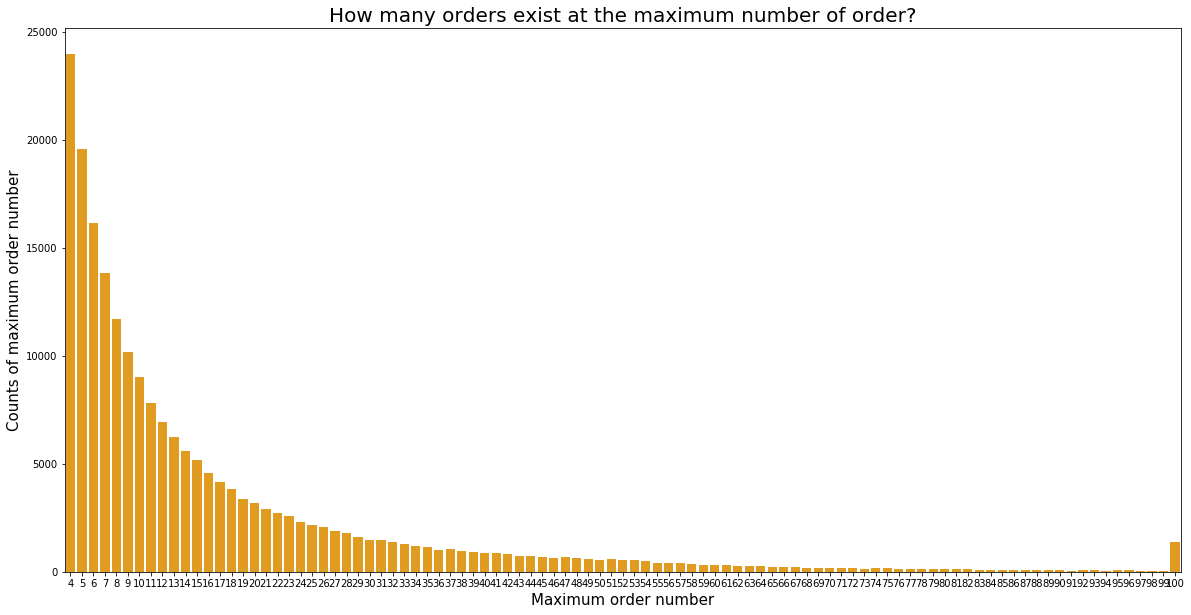

In [33]:
order_num = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
order_num = order_num.order_number.value_counts()

plt.figure(figsize=(20, 10))
sns.barplot(order_num.index, order_num.values, color='orange')
plt.title('How many orders exist at the maximum number of order?', size = 20)
plt.ylabel('Counts of maximum order number', size=15)
plt.xlabel('Maximum order number', size=15)
plt.show()

그래프를 보면, 주로 적은 양의 주문에 대다수의 고객이 몰려있는 것을 확인할 수 있는데, 100개의 주문을 한 사람이 꽤 존재하는 것을 파악할 수 있다. 따라서 우리는 100개의 주문을 한 사람에 초점을 맞춰 분석을 하고자 한다. 

In [20]:
order_num[100]

1374

100개의 주문을 한 고객의 수를 확인해본 결과 1374명의 고객이 존재한다. 

Step2. 데이터 분석

In [21]:
# product, aisle, depts와 prior 데이터 합치기
prior = pd.merge(prior, products, on='product_id', how='left')
prior = pd.merge(prior, aisles, on='aisle_id', how='left')
prior = pd.merge(prior, depts, on='department_id', how='left')
prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [22]:
prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [23]:
prior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 9 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
product_name         object
aisle_id             int64
department_id        int64
aisle                object
department           object
dtypes: int64(6), object(3)
memory usage: 2.4+ GB


1) 1374명의 고객 분리

In [24]:
orders_number=orders[orders['order_number']==100]
for a in orders_number['user_id']:
    orders.loc[orders['user_id']==a, 'vip']=True

In [25]:
viplist = orders[orders['vip'] == True]
viplist.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,vip
3165,3264342,210,prior,1,0,12,NaN,True
3166,2420729,210,prior,2,3,7,3.0,True
3167,2844082,210,prior,3,6,11,3.0,True
3168,1751757,210,prior,4,0,13,1.0,True
3169,2531142,210,prior,5,3,7,3.0,True


In [26]:
viplist = pd.merge(viplist, prior, on='order_id', how='left')

In [27]:
viplist.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,vip,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,3264342,210,prior,1,0,12,NaN,True,33043.0,1.0,0.0,Crescent Rolls,105.0,13.0,doughs gelatins bake mixes,pantry
1,3264342,210,prior,1,0,12,NaN,True,7559.0,2.0,0.0,Cinnamon Rolls with Icing,105.0,13.0,doughs gelatins bake mixes,pantry
2,3264342,210,prior,1,0,12,NaN,True,28199.0,3.0,0.0,"Clementines, Bag",123.0,4.0,packaged vegetables fruits,produce
3,3264342,210,prior,1,0,12,NaN,True,24799.0,4.0,0.0,Vanilla Skyr Nonfat Yogurt,120.0,16.0,yogurt,dairy eggs
4,3264342,210,prior,1,0,12,NaN,True,36389.0,5.0,0.0,Organic Rainbow Chard Vegetable,83.0,4.0,fresh vegetables,produce
5,3264342,210,prior,1,0,12,NaN,True,21903.0,6.0,0.0,Organic Baby Spinach,123.0,4.0,packaged vegetables fruits,produce
6,3264342,210,prior,1,0,12,NaN,True,23909.0,7.0,0.0,2% Reduced Fat Milk,84.0,16.0,milk,dairy eggs
7,2420729,210,prior,2,3,7,3.0,True,35547.0,1.0,0.0,Organic Baby Kale,83.0,4.0,fresh vegetables,produce
8,2420729,210,prior,2,3,7,3.0,True,36389.0,2.0,1.0,Organic Rainbow Chard Vegetable,83.0,4.0,fresh vegetables,produce
9,2420729,210,prior,2,3,7,3.0,True,23909.0,3.0,1.0,2% Reduced Fat Milk,84.0,16.0,milk,dairy eggs


VIP 고객들이 주로 사는 물건이 어떤 Department에 속하는지 확인

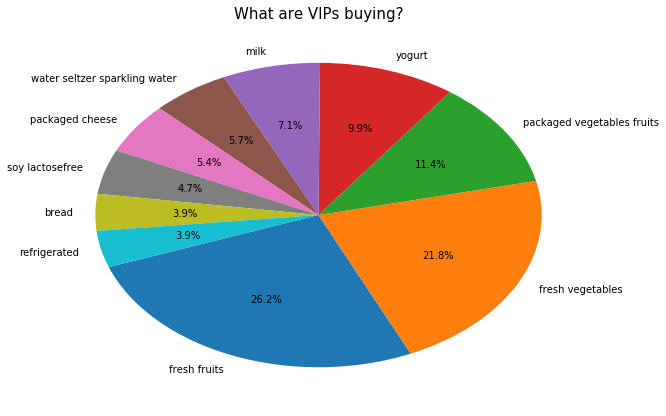

In [28]:
plt.figure(figsize=(10, 7))
viplist_aisle_all = viplist['aisle'].value_counts().head(10)
viplist_aisle_all
labels = (np.array(viplist_aisle_all.index))
sizes = (np.array((viplist_aisle_all / viplist_aisle_all.sum())*100))
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=200)
plt.title('What are VIPs buying?', fontsize = 15)
plt.show()

차트를 보면 과일, 야채, 유제품 순으로 구매를 많이 하는 것을 알 수 있다. 

2) reorder 비율 확인

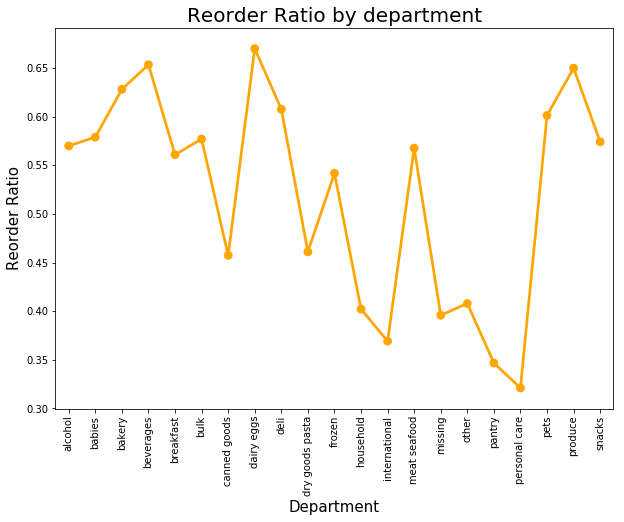

In [34]:
prior_reorder = prior.groupby(['department'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(10, 7))
sns.pointplot(prior_reorder['department'].values, prior_reorder['reordered'].values, color='Orange')
plt.ylabel('Reorder Ratio', fontsize=15)
plt.xlabel('Department', fontsize=15)
plt.title("Reorder Ratio by department", fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

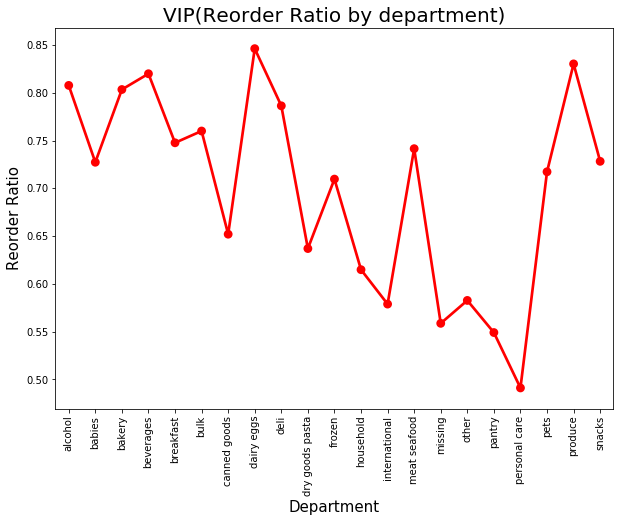

In [35]:
vip_reorder = viplist.groupby(['department'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(10, 7))
sns.pointplot(vip_reorder['department'].values, vip_reorder['reordered'].values, color='Red')
plt.ylabel('Reorder Ratio', fontsize=15)
plt.xlabel('Department', fontsize=15)
plt.title("VIP(Reorder Ratio by department)", fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

재구매비율이 높은 물품은 생필품이다. 또한 VIP 고객의 재구매비율 그래프와 전체 고객의 재구매비율 그래프가 매우 흡사하다. 